<a href="https://colab.research.google.com/github/arianza1210/ComputerVision/blob/main/Kupu_kupu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import numpy as np 
import math, os, sys
import itertools

import matplotlib.pyplot as plt
plt.style.use('default')
from scipy import ndimage

from skimage import measure, morphology
from skimage.io import imsave, imread
from skimage.filters import threshold_otsu
from skimage.transform import resize

import tensorflow as tf
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import pandas as pd

In [3]:
# Import Libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import glob
import random

from IPython.display import Image
import matplotlib.pyplot as plt

In [4]:
train_dir = os.path.join('/content/drive/MyDrive/Dataset CNN/Spliting Data/train')
validation_dir = os.path.join('/content/drive/MyDrive/Dataset CNN/Spliting Data/valid')

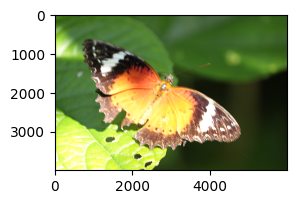

In [5]:
#Perintah untuk memvisualisasikan satu gambar dari data train
image = imread("/content/drive/MyDrive/Dataset CNN/Spliting Data/train/kupu_batik_cap/Kupu Batik Cap-10.JPG")
plt.figure(figsize=(3,3))
plt.imshow(image)

In [6]:
#Memuat semua gambar ke memori untuk pertama kali

#Memuat dataset pelatihan
IMAGE_SIZE = 224
BATCH_SIZE = 8
base_dir = os.path.join('/content/drive/MyDrive/Dataset CNN/Spliting Data/train')

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

#Memuat dataset pengujian
X_test = []
y_test = []
labels = ['kupu_batik_cap', 'kupu_harimau_kuning_hijau', 'kupu_hijau_biru','kupu_jarak','kupu_jojo','kupu_pantat_merah','kupu_raja_helena','kupu_raja_limau']

for i,label in enumerate(labels):
    folder = os.path.join("/content/drive/MyDrive/Dataset CNN/Spliting Data/valid",label)
    files = sorted(os.listdir(folder))
    files = [x for x in files if x.endswith(".JPG")]
    for k,file in enumerate(files):
        image_path = os.path.join(folder, file)
        
        image = imread(image_path)/255.
        image = resize(image,(224,224))
        X_test.append(image)
        category = os.path.split(folder)[-1]
        y_test.append(i)

X_test = np.array(X_test)
y_test = np.array(y_test)

#Menampilkan bentuk dari masing-masing dataset
for image_batch, label_batch in train_generator:
  break
print("Bentuk array dari dataset train (pelatihan) adalah:", image_batch.shape,label_batch.shape)
for image_batch, label_batch in val_generator:
  break
print("Bentuk array dari dataset validation (validasi) adalah:", image_batch.shape,label_batch.shape)
print("Bentuk array dari dataset test (pengujian) adalah:", X_test.shape,y_test.shape)

Found 376 images belonging to 8 classes.
Found 91 images belonging to 8 classes.
Bentuk array dari dataset train (pelatihan) adalah: (8, 224, 224, 3) (8, 8)
Bentuk array dari dataset validation (validasi) adalah: (8, 224, 224, 3) (8, 8)
Bentuk array dari dataset test (pengujian) adalah: (150, 224, 224, 3) (150,)


In [7]:
print (train_generator.class_indices)

labels_txt = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels_txt)

{'kupu_batik_cap': 0, 'kupu_harimau_kuning_hijau': 1, 'kupu_hijau_biru': 2, 'kupu_jarak': 3, 'kupu_jojo': 4, 'kupu_pantat_merah': 5, 'kupu_raja_helena': 6, 'kupu_raja_limau': 7}


In [14]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

In [15]:
input_shape = (224, 224, 3)

In [16]:
y_test2 = to_categorical(y_test)
X_test3, y_test3 = (X_test,y_test2)

In [17]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=input_shape),

    MaxPooling2D(),
    
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    # Dropout(0.2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    # Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),

    Dense(8, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)      

In [20]:
# Use TensorBoard
callbacks = TensorBoard(log_dir='./Graph')

In [21]:
# Compile Model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [22]:
history = model.fit(train_generator,batch_size=8,epochs=10,validation_data=val_generator, callbacks=[callbacks])

Epoch 1/10
47/47 [==============================] - 400s 8s/step - loss: 1.6176 - accuracy: 0.3910 - precision: 0.8058 - recall: 0.2207 - val_loss: 0.4017 - val_accuracy: 0.8901 - val_precision: 0.9398 - val_recall: 0.8571
Epoch 2/10
47/47 [==============================] - 147s 3s/step - loss: 0.4029 - accuracy: 0.8590 - precision: 0.9046 - recall: 0.8324 - val_loss: 0.1107 - val_accuracy: 0.9780 - val_precision: 1.0000 - val_recall: 0.9560
Epoch 3/10
47/47 [==============================] - 147s 3s/step - loss: 0.1860 - accuracy: 0.9468 - precision: 0.9587 - recall: 0.9255 - val_loss: 0.2500 - val_accuracy: 0.9341 - val_precision: 0.9744 - val_recall: 0.8352
Epoch 4/10
47/47 [==============================] - 148s 3s/step - loss: 0.1636 - accuracy: 0.9415 - precision: 0.9562 - recall: 0.9282 - val_loss: 0.1068 - val_accuracy: 0.9780 - val_precision: 0.9778 - val_recall: 0.9670
Epoch 5/10
47/47 [==============================] - 128s 3s/step - loss: 0.0269 - accuracy: 0.9894 - precisi

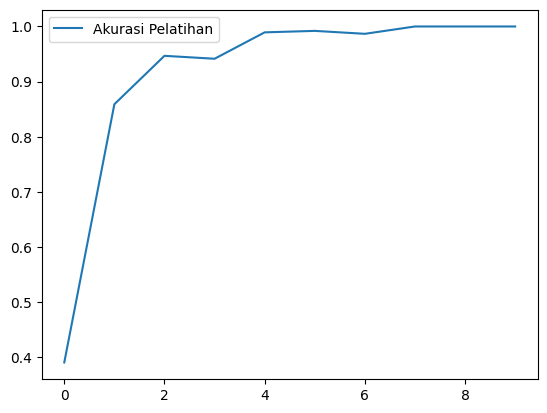

In [25]:
plt.plot(history.history["accuracy"],label="Akurasi Pelatihan")
plt.legend()
plt.show()

In [27]:
#Prediksi Label Validasi dengan Pelatihan
n = 4
input_image = image_batch[n][np.newaxis,...]
print("Labelnya adalah: ", label_batch[n])

predictions = model.predict(input_image)
print("Prediksinya adalah",predictions[0])

Labelnya adalah:  [0. 0. 0. 0. 0. 0. 1. 0.]
Prediksinya adalah [1.2981882e-13 8.9581698e-10 2.8452827e-09 1.6858634e-10 5.8161663e-06
 6.0417253e-05 9.9992502e-01 8.7202980e-06]


In [28]:
#Memeriksa matriks model
print(model.metrics_names)
#Evaluasi data test
print(model.evaluate(x= X_test3, y = y_test3))


['loss', 'accuracy', 'precision', 'recall']
5/5 [==============================] - 5s 699ms/step - loss: 8.5740 - accuracy: 0.4667 - precision: 0.4698 - recall: 0.4667
[8.57398796081543, 0.46666666865348816, 0.46979865431785583, 0.46666666865348816]


In [29]:
#Menampilkan matriks yang benar dan matriks hasil prediksi

#Label yang benar
y_true = np.argmax(y_test2,axis=1)

#Label prediksi
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print(y_true)
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7]
[0 0 2 2 2 0 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2
 5 0 2 2 5 5 5 5 2 5 2 2 2 5 2 5 2 3 0 2 2 2 0 0 3 3 3 3 3 3 3 3 3 2 4 4 4
 4 4 5 5 5 4 5 5 5 5 5 5 5 6 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 2 2 2 5 5 5 5 5
 6 6 6 5 6 5 5 5 5 6 6 5 5 4 5 5 5 6 5 2 5 2 5 7 5 5 5 5 5 5 2 5 5 5 1 2 5
 5 5]


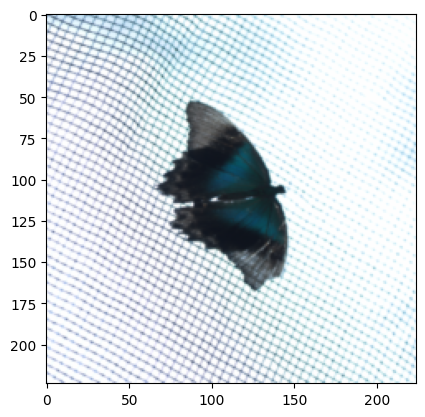

Label yang benar adalah: 2 : kupu_hijau_biru
Nilai yang diprediksi adalah: [1.76731904e-12 3.40806855e-10 2.74857739e-03 1.11968364e-13
 3.17143940e-06 9.97246146e-01 2.12578880e-06 8.51633705e-13]
Label yang diprediksi adalah: 5 : kupu_pantat_merah
Prediksi salah


In [34]:
n =50 #Jangan melampaui (nilai dari gambar test - 1)

plt.imshow(X_test[n])
plt.show()

true_label = np.argmax(y_test2,axis=1)[n]
print("Label yang benar adalah:",true_label,":",labels[true_label])
prediction = model.predict(X_test[n][np.newaxis,...])[0]
print("Nilai yang diprediksi adalah:",prediction)
predicted_label = np.argmax(prediction)
print("Label yang diprediksi adalah:",predicted_label,":",labels[predicted_label])

if true_label == predicted_label:
    print("Prediksi benar")
else:
    print("Prediksi salah")


Normalized confusion matrix
[[0.56 0.   0.44 0.   0.   0.   0.   0.  ]
 [0.07 0.83 0.07 0.   0.   0.03 0.   0.  ]
 [0.   0.   0.53 0.   0.   0.47 0.   0.  ]
 [0.19 0.   0.19 0.62 0.   0.   0.   0.  ]
 [0.   0.   0.07 0.   0.2  0.7  0.03 0.  ]
 [0.   0.   0.27 0.   0.   0.73 0.   0.  ]
 [0.   0.   0.09 0.   0.04 0.57 0.3  0.  ]
 [0.   0.06 0.12 0.   0.   0.75 0.   0.06]]


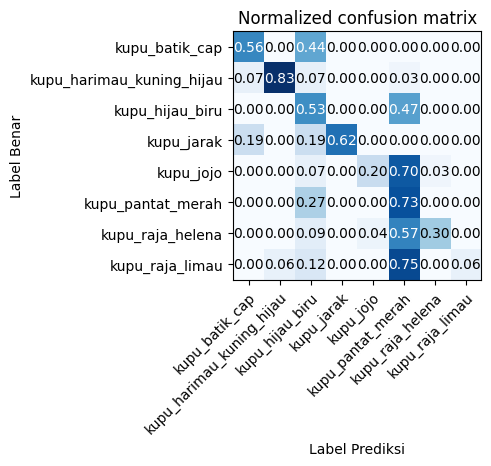

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Label Benar',
           xlabel='Label Prediksi')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')
